In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from prep_files_for_altar import main

# multi, faults, datasets, trans = main()

In [3]:
import pickle
# with open("../results/in01/inputs/tmp_data.pickle", "wb") as f:
#     pickle.dump((multi, faults, datasets, trans), f)
multi, faults, datasets, trans = pickle.load(open("../results/in01/inputs/tmp_data.pickle", "rb"))

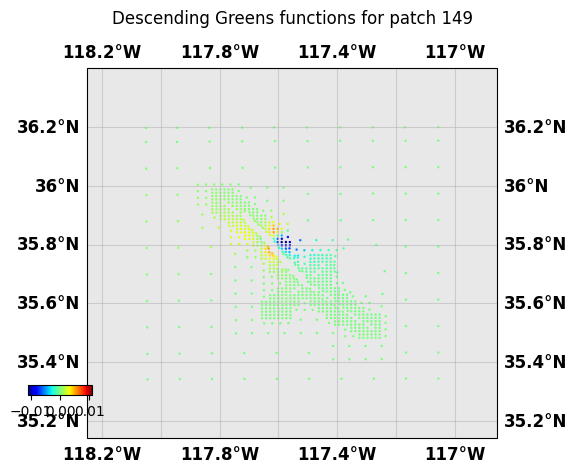

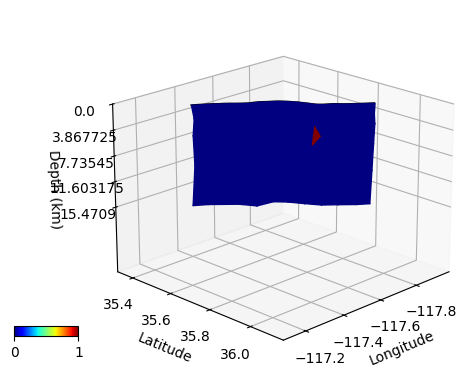

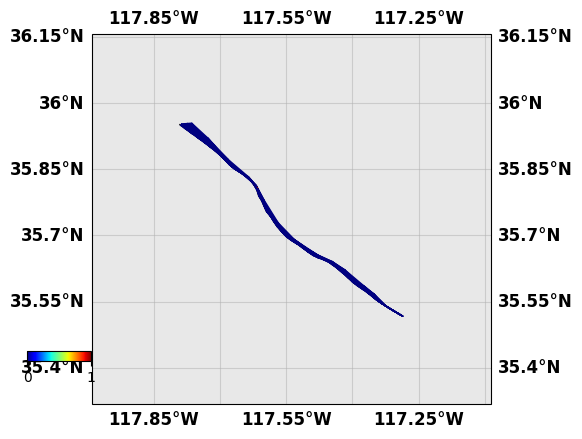

In [62]:
import matplotlib.pyplot as plt
%matplotlib inline
# %matplotlib ipympl
plt.close("all")
import numpy as np

idx = np.random.randint(0, 252)
# idx = 47
# idx = 237
kwargs = {}
# kwargs["los"] = (datasets[0].lon, datasets[0].lat, datasets[0].los[:,0], datasets[0].los[:,1], {"color":'grey', "width":0.0015})

datasets[1].synth = faults[0].G["Downsampled D071_20190704-0716"]["strikeslip"][:,idx]
norm_bnd = np.max(np.abs(datasets[1].synth))
datasets[1].plot(markersize=3., data="synth", title=f"Descending Greens functions for patch {idx}", norm=(-norm_bnd, norm_bnd), **kwargs)

faults[0].initializeslip()
faults[0].slip[idx, 0] = 1.
faults[0].plot(view=(20., 45.))

plt.show()

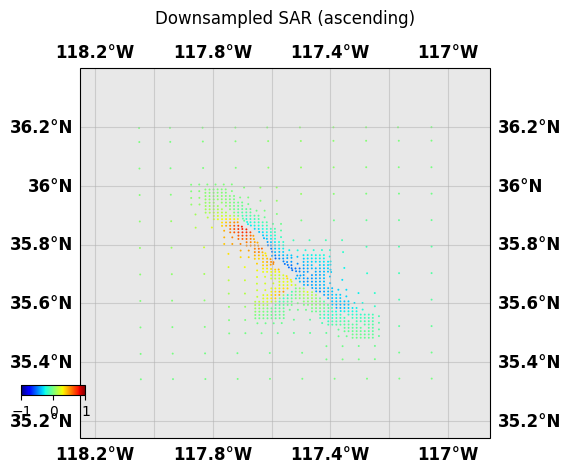

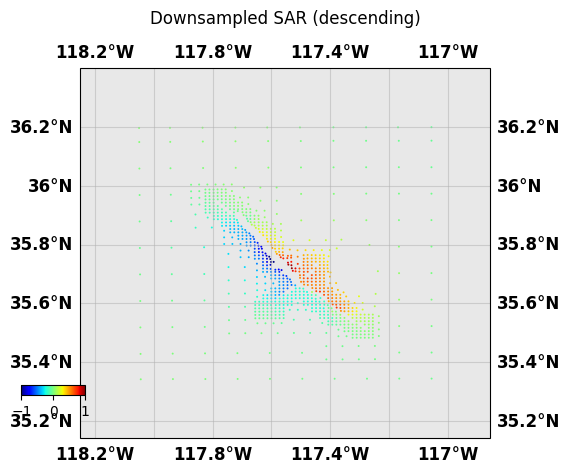

In [19]:
datasets[0].plot(markersize=2., data="data", title="Downsampled SAR (ascending)", norm=(-1., 1.))
datasets[1].plot(markersize=2., data="data", title="Downsampled SAR (descending)", norm=(-1., 1.))
# datasets[2].plot(faults=faults)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# datasets[0].checkNaNs()
# print(np.sum(np.isnan( datasets[0].Cd)))
diags = np.diagonal(np.fliplr(datasets[0].Cd))
plt.plot(diags)
# print(diags)
# datasets[0].Cd

In [ ]:
multi.describeParams()

Parameter Description ----------------------------------
-----------------
Fault Name                    ||Strike Slip ||Dip Slip    ||Tensile     ||Coupling    ||Extra Parms 
fault0                        ||   0 -  253 || 253 -  506 ||None        ||None        ||None        
-----------------
Fault Name                    ||Strike Slip ||Dip Slip    ||Tensile     ||Coupling    ||Extra Parms 
fault1                        || 506 -  574 || 574 -  642 ||None        ||None        ||None        
-----------------
Fault Name                    ||Strike Slip ||Dip Slip    ||Tensile     ||Coupling    ||Extra Parms 
Orbits and reference frame    ||None        ||None        ||None        ||None        || 642 -  648 


In [ ]:
bounds = []
bounds += [[-10., 0.]] * faults[0].N_slip
bounds += [[-.2, .2]] * faults[0].N_slip
bounds += [[0., 10.]] * faults[1].N_slip
bounds += [[-.2, .2]] * faults[1].N_slip
bounds += [[-1., 1.]]*trans.TransformationParameters
mprior = np.zeros((len(bounds),))


multi.ConstrainedLeastSquareSoln(bounds=bounds, 
                              iterations=400,
                              method='L-BFGS-B',
                              mprior=mprior, 
                              tolerance=1e-7, 
                              maxfun=1e10, 
                              checkIter=True)

---------------------------------
---------------------------------
Assembling the Cm matrix 
Sigma = 5.0
Lambda = 5.0
Lambda0 = 0.2633518553278455
---------------------------------
---------------------------------
Assembling the Cm matrix 
Sigma = 5.0
Lambda = 5.0
Lambda0 = 0.44255408054799683
---------------------------------
---------------------------------
Computing the Constrained least squares solution
Final data space size: 1542
Final model space size: 648
Computing the inverse of the model covariance
Computing the inverse of the data covariance
Performing constrained minimzation


In [11]:
# multi.mpost[-6:]
trans.G["Downsampled A064_20190704-0710"][3]

array([[ 1.        , -0.99982493, -0.7968055 ],
       [ 1.        , -0.99899611, -0.6152484 ],
       [ 1.        , -0.99781314, -0.42602753],
       ...,
       [ 1.        ,  0.99759454,  0.70947053],
       [ 1.        ,  0.99796222,  0.8995497 ],
       [ 1.        ,  0.9977659 ,  0.99555073]], shape=(778, 3))

In [72]:
multi.distributem()
trans.removePredictions(datasets)

#----------------------------------------
# Plot predictions and inferred slip
for data in datasets:
   data.buildsynth(multi.faults)

normalizing factors are  450.06677849773735 3953.570731482895 45.01999203633483 52.751636264706576
normalizing factors are  450.0782897422788 3953.4189022280952 45.04727138610593 52.90370512886875


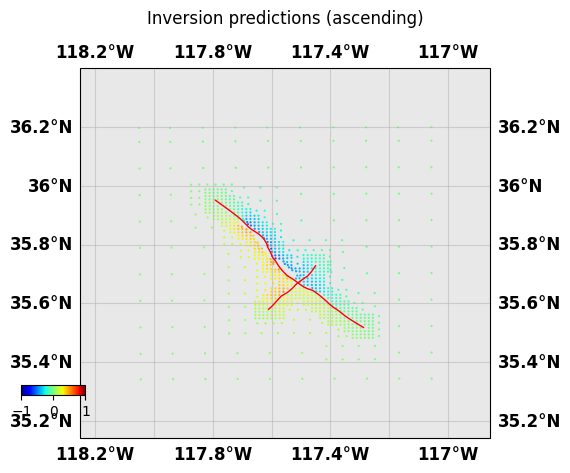

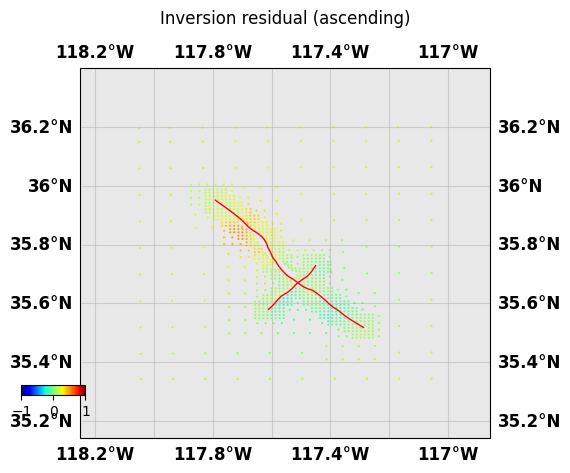

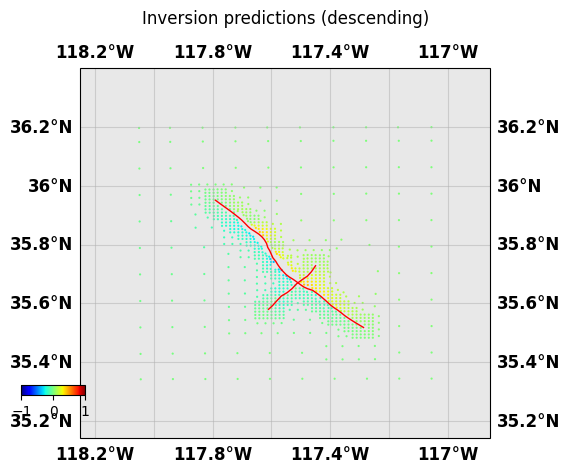

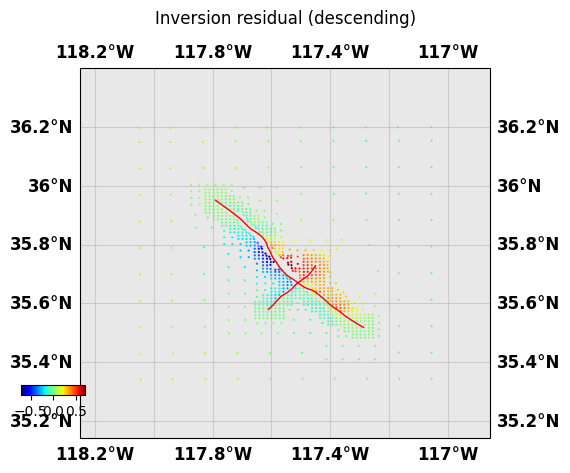

In [ ]:
datasets[0].plot(markersize=2.5, data="synth", title="Inversion predictions (ascending)", norm=(-1., 1.), faults=faults)
datasets[0].plot(markersize=2.5, data="res", title="Inversion residual (ascending)", norm=(-1., 1.), faults=faults)
datasets[1].plot(markersize=2.5, data="synth", title="Inversion predictions (descending)", norm=(-1., 1.), faults=faults)
datasets[1].plot(markersize=2.5, data="res", title="Inversion residual (descending)", norm=(-1, 1.) faults=faults)
# datasets[2].plot(faults=faults, data="res", legendscale=1.)

In [67]:
multi.distributem()

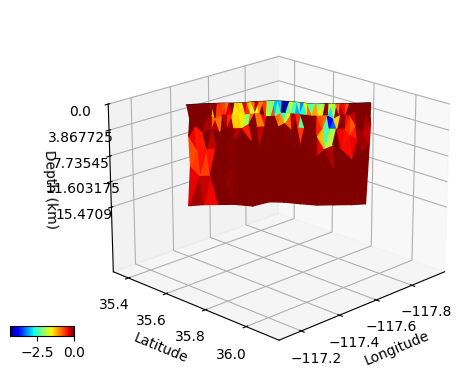

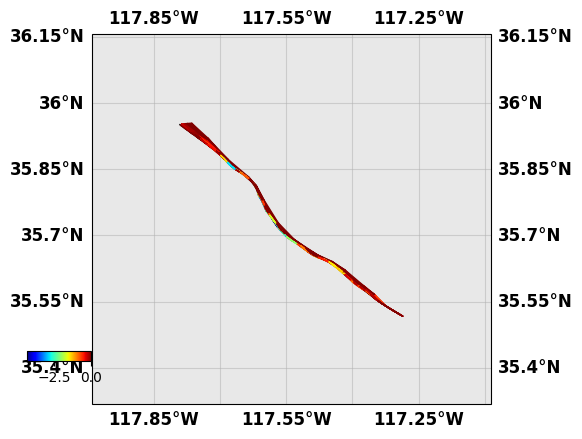

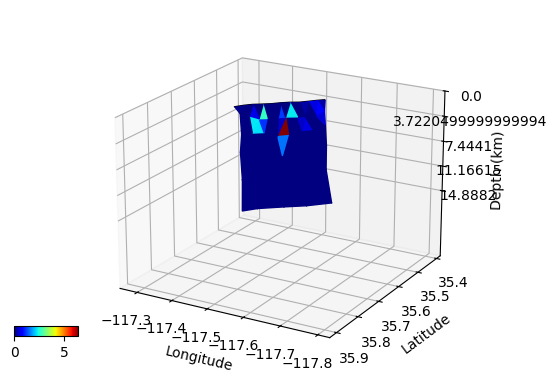

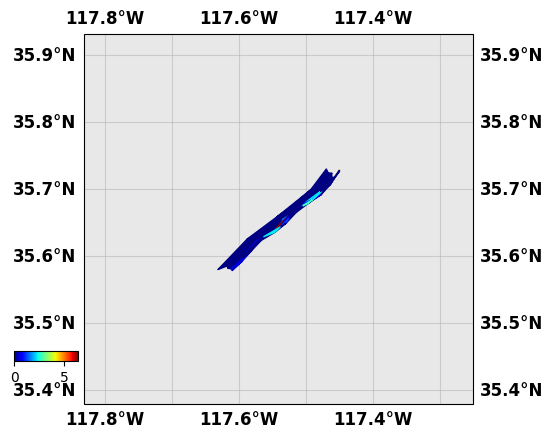

In [70]:
faults[0].plot(view=(20., 45.), slip="strikeslip")
faults[1].plot(view=(20., 120.), slip="strikeslip")